In [59]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import rc
from windrose import WindroseAxes
import matplotlib
matplotlib.rcParams.update({'font.size': 22})

# Load Data

In [2]:
start_date = np.datetime64('2016-08-01')
end_date = np.datetime64('2017-05-01')
    
#helper function
def read_and_trim(file_path):
    # read file into dataframe
    df = pd.read_csv(file_path,header=0, index_col=0, skiprows=[0,2,3], na_values="NAN")    
    # convert time column entries to datetime objects    
    df.index = pd.to_datetime(df.index)
    return df[start_date:end_date]


In [3]:
file_ADV = 'Adventdalen_Hour.dat'
file_GF = "Gruvefjellet_Res_data.dat"

ADV_data = read_and_trim(file_ADV)
GF_data = read_and_trim(file_GF)
speeds = [ADV_data["VH2_mps_mid"], GF_data["VH_mps_mid"]]
directions = [ADV_data["VR1_gr_framh"], GF_data["VR_gr_framh"]]
titles = ["Adventdalen", "Gruvefjellet"]

# Plot

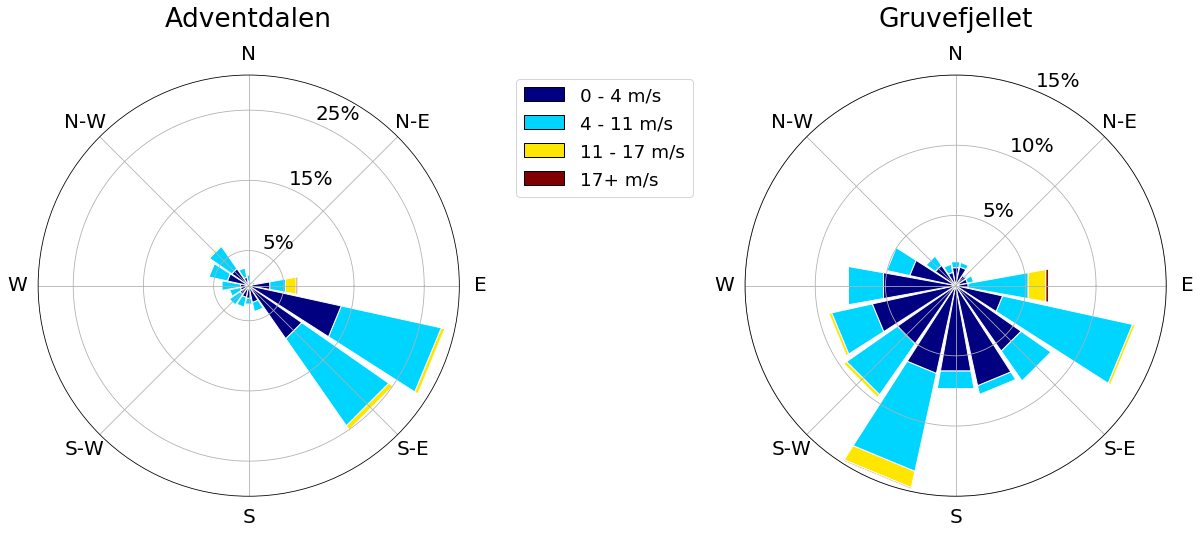

In [99]:
file_name = "windroses"

fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(left=.05, bottom=.15, right=.95, top=.8)
gs = gridspec.GridSpec(1, 2)     # (nblines, nbcol)
bottom, top, left, right = gs.get_grid_positions(fig)  # [bottom, top, left, right]

percentranges = [[0,30],[0,15]]

steps = [10, 5]
for i in range(2):
    rect = [left[i],
            bottom[0],
            right[i]-left[i],
            0.9*(top[0]-bottom[0])]  

    ax = WindroseAxes(fig, rect)
    fig.add_axes(ax)
    ax.bar(directions[i], speeds[i], normed=True, opening=0.9, edgecolor='white', bins = [0,4,11,17])
    ax.set_title(titles[i], position=(0.5, 1.1))
    ax.set_yticks(np.arange(5, 35, step=steps[i]))
    percentageticks = ["%d%%"% i for i in np.arange(5, 35, step=steps[i])]
    #ax.set_yticklabels(np.arange(5, 35, step=5))
    ax.set_yticklabels(percentageticks)
    #ax.set_ylim(0,30)
    ax.set_ylim(percentranges[i])

legend_labels = ['0 - 4 m/s', '4 - 11 m/s', '11 - 17 m/s', '17+ m/s']
ax.set_legend(labels = legend_labels, loc="right", borderaxespad = 30, prop={'size': 20}, bbox_to_anchor=(0.30, 0.8, 1.0, .10))
leg = plt.gca().get_legend()
ltext  = leg.get_texts()
plt.setp(ltext, fontsize='small')
fig.savefig("plots/%s.eps" % file_name)
fig.savefig("plots/%s.png" % file_name, dpi=200)
plt.show()